# BikeSharing-Lasso-Ridge-ElasticNet-AdaptiveLasso

本项目采用Kaggle上的共享单车使用量数据集(https://www.kaggle.com/c/bike-sharing-demand/data ), 旨在预测美国华盛顿共享单车租赁的使用量。

主要利用python中sklearn库，使用线性回归、Ridge回归、Lasso回归、Elastic Net以及Adaptive Lasso模型对数据进行拟合，进而比较模型的RMSE和score值。

同时，本项目的相关代码也发布在Kaggle上(https://www.kaggle.com/myzhai/bike-sharing-lasso-ridge-elasticnet-adaptivelasso )。 

# 1. 描述性统计

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn import metrics
from math import sqrt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
pd.set_option('display.max_rows',20)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


通过以上可以得知数据维度10886行X12列, 除了第一列其它均显示为数值, 具体的格式还要进一步查看, 对于各列的解释也放入下一环节.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


除了datetime为字符串型, 其他均为数值型, 且无缺失值.

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


温度, 体表温度, 相对湿度, 风速均近似对称分布, 而非注册用户, 注册用户,以及总数均右边分布.

In [5]:
for i in range(5,12):
    name = df.columns[i]
    print('{0}偏态系数为{1}，峰态系数为{2}'.format(name,df[name].skew(),df[name].kurt()))

temp偏态系数为0.003690844422472008，峰态系数为-0.9145302637630794
atemp偏态系数为-0.10255951346908665，峰态系数为-0.8500756471754651
humidity偏态系数为-0.08633518364548581，峰态系数为-0.7598175375208864
windspeed偏态系数为0.5887665265853944，峰态系数为0.6301328693364932
casual偏态系数为2.4957483979812567，峰态系数为7.551629305632764
registered偏态系数为1.5248045868182296，峰态系数为2.6260809999210672
count偏态系数为1.2420662117180776，峰态系数为1.3000929518398334


temp, atemp, humidity低度偏态, windspeed中度偏态, casual, registered, count高度偏态
temp, atemp, humidity为平峰分布, windspeed,casual, registered, count为尖峰分布.

# 2. Data preprocessing数据预处理

由于没有缺失值，只需检查重复值、异常值

## 2.1 重复值

In [6]:
print('未去重：',df.shape)
print('去重：',df.drop_duplicates().shape)

未去重： (10886, 12)
去重： (10886, 12)


表明没有重复值

## 2.2 异常值

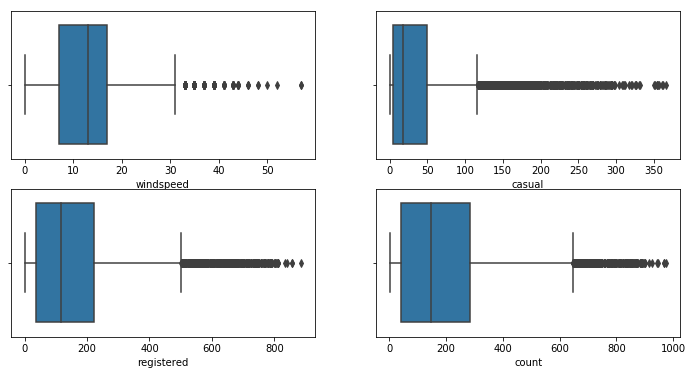

In [7]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
sns.boxplot(x='windspeed',data=df,ax=axes[0][0])
sns.boxplot(x='casual',data=df,ax=axes[0][1])
sns.boxplot(x='registered',data=df,ax=axes[1][0])
sns.boxplot(x='count',data=df,ax=axes[1][1])

租赁数量会受小时的影响, 比如说上班高峰期等, 故在这里先不处理异常值.

## 2.3 数据加工

首先加工日期，转换"时间和日期"的格式, 并提取出小时, 日, 月, 年

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['year_month'] = df.datetime.dt.strftime('%Y-%m')
df['date'] = df.datetime.dt.date
df.drop('datetime',axis=1,inplace=True)

In [9]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011-01,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011-01,2011-01-01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,5,1,2011-01,2011-01-01
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5,1,2011-01,2011-01-01
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5,1,2011-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2,12,2012-12,2012-12-19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2,12,2012-12,2012-12-19
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2,12,2012-12,2012-12-19
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012-12,2012-12-19


加工季节

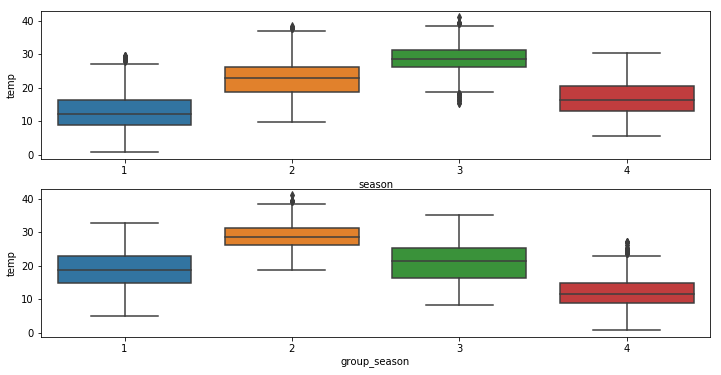

In [10]:
import numpy as np 
df['group_season'] = np.where((df.month <=5) & (df.month >=3), 1, np.where((df.month <=8) & (df.month >=6), 2, np.where((df.month <=11) & (df.month >=9), 3, 4))) 
fig, ax = plt.subplots(2, 1, figsize=(12, 6)) 
#绘制气温和季节箱线图 
sns.boxplot(x='season', y='temp',data=df, ax=ax[0]) 
sns.boxplot(x='group_season', y='temp',data=df, ax=ax[1])

第一个图是调整之前的, 就中位数来说, 春季气温最低, 秋季气温最高

第二个图是调整之后的, 就中位数来说, 冬季气温最低, 夏季气温最高

显然第二张的图的结果较符合常理, 故删除另外那一列.

In [11]:
df.drop('season', axis=1, inplace=True) 
df.shape

(10886, 16)

# 3. 特征分析

## 3.1 日期和总租赁数量

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


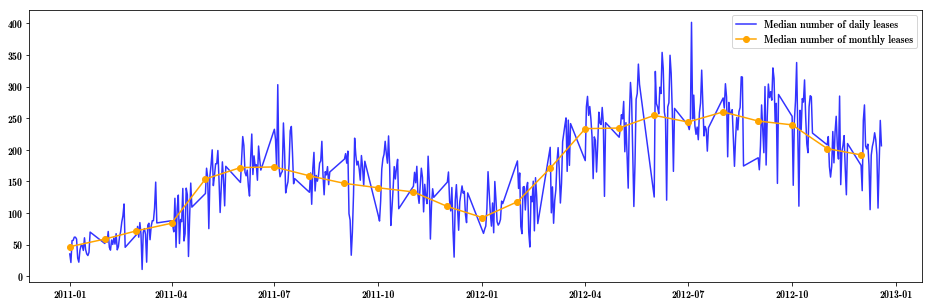

In [12]:
#设置字体 
font = {'family': 'cmb10'} 
matplotlib.rc('font', **font) 
#分别计算日期和月份中位数 
group_date = df.groupby('date')['count'].median() 
group_month = df.groupby('year_month')['count'].median() 
group_month.index = pd.to_datetime(group_month.index) 
plt.figure(figsize=(16,5)) 
plt.plot(group_date.index, group_date.values, '-', color = 'b', label = 'Median number of daily leases', alpha=0.8) 
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = 'Median number of monthly leases') 
plt.legend() 
plt.show()

2012年相比2011年租赁数量有所增长, 且波动幅度相类似.

## 3.2 月份和总租赁数量

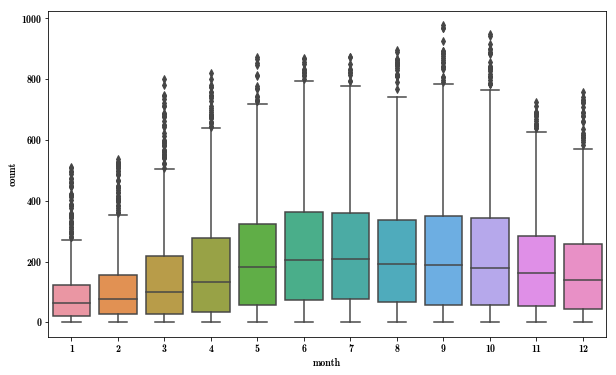

In [13]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='month', y='count', data=df) 
plt.show()

与上图的波动幅度基本一致, 另外每个月均有不同程度的离群值.

## 3.3 季节和总租赁数量

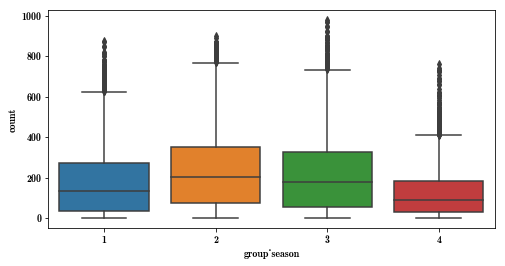

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='group_season',y='count',data=df)
plt.show()

## 3.4 星期几和租赁数量

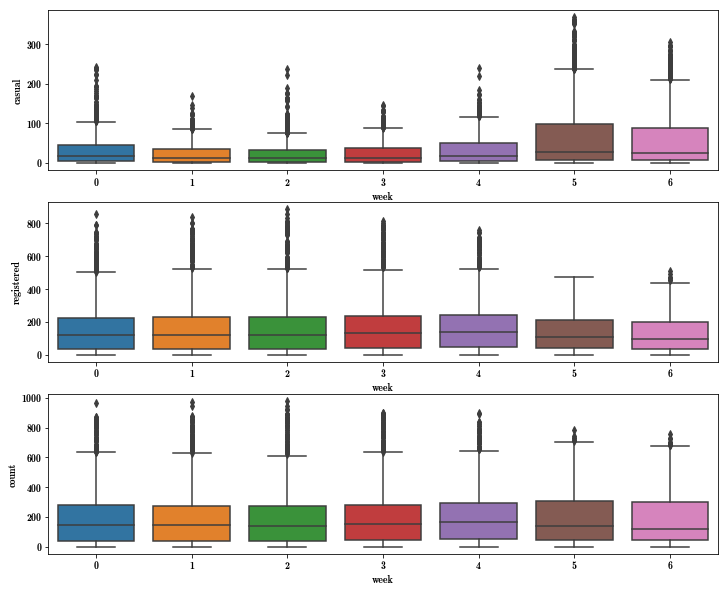

In [15]:
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10)) 
sns.boxplot(x='week',y='casual',data=df,ax=axes[0]) 
sns.boxplot(x='week',y='registered', data=df, ax=axes[1]) 
sns.boxplot(x='week',y='count', data=df, ax=axes[2]) 
plt.show()

就中位数来说, 未注册用户周六和周日较多, 而注册用户则周内较多, 对应的总数也是周内较多, 且周内在总数的离群值较多(0代表周一, 6代表周日)

## 3.5 节假日, 工作日和总租赁数量

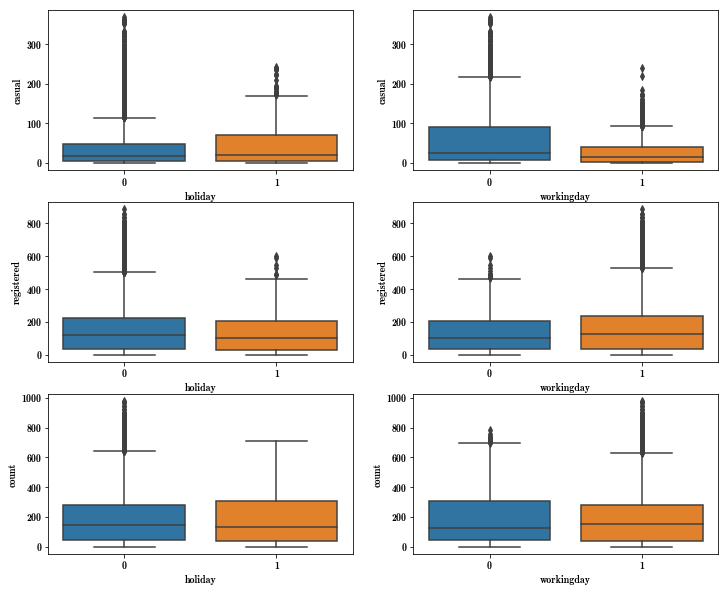

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 
sns.boxplot(x='holiday', y='casual', data=df, ax=axes[0][0]) 
sns.boxplot(x='holiday', y='registered', data=df, ax=axes[1][0]) 
sns.boxplot(x='holiday', y='count', data=df, ax=axes[2][0]) 
sns.boxplot(x='workingday', y='casual', data=df, ax=axes[0][1]) 
sns.boxplot(x='workingday', y='registered', data=df, ax=axes[1][1]) 
sns.boxplot(x='workingday', y='count', data=df, ax=axes[2][1]) 
plt.show()

未注册用户: 在节假日较多, 在工作日较少
注册用户: 在节假日较少, 在工作日较多
总的来说, 节假日租赁较少, 工作日租赁较多, 初步猜测多数未注册用户租赁自行车是用来非工作日出游, 而多数注册用户则是工作日用来上班或者上学.

## 3.6 小时和总租赁数量的关系

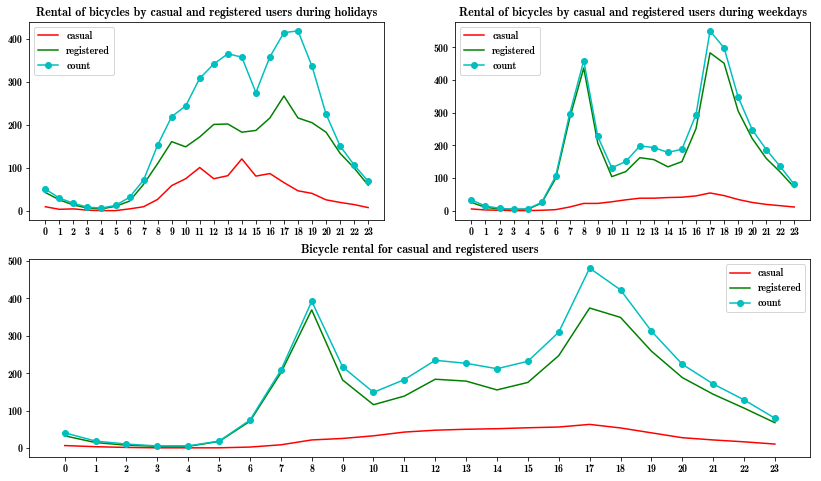

In [17]:
plt.figure(1, figsize=(14, 8))
plt.subplot(221)
hour_casual = df[df.holiday==1].groupby('hour')['casual'].median()
hour_registered = df[df.holiday==1].groupby('hour')['registered'].median()
hour_count = df[df.holiday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.xticks(hour_casual.index)
plt.title('Rental of bicycles by casual and registered users during holidays')
#绘制第二个子图
plt.subplot(222)
hour_casual = df[df.workingday==1].groupby('hour')['casual'].median()
hour_registered = df[df.workingday==1].groupby('hour')['registered'].median()
hour_count = df[df.workingday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.title('Rental of bicycles by casual and registered users during weekdays')
plt.xticks(hour_casual.index)
#绘制第三个子图
plt.subplot(212)
hour_casual = df.groupby('hour')['casual'].median()
hour_registered = df.groupby('hour')['registered'].median()
hour_count = df.groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.title('Bicycle rental for casual and registered users')
plt.xticks(hour_casual.index)
plt.show()


## 3.5 天气和总租赁数量的关系

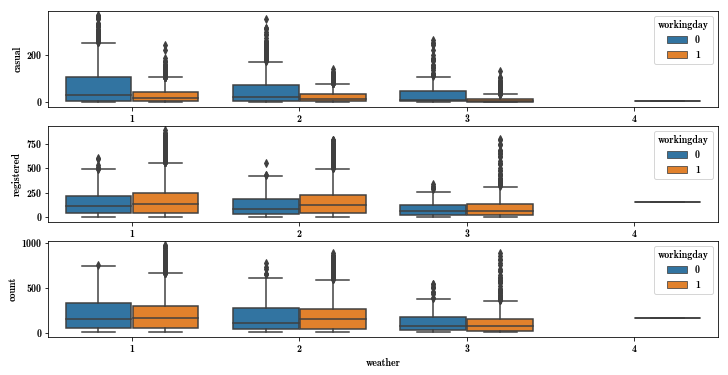

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6)) 
sns.boxplot(x='weather', y='casual', hue='workingday',data=df, ax=ax[0]) 
sns.boxplot(x='weather', y='registered',hue='workingday', data=df, ax=ax[1]) 
sns.boxplot(x='weather', y='count',hue='workingday', data=df, ax=ax[2])

## 3.6 其他变量和总租赁数量的关系

这里我直接使用利用seaborn的pairplot绘制剩余的温度, 体感温度, 相对湿度, 风速这四个连续变量与未注册用户和注册用户的关系在一张图上.

In [19]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date,group_season
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011-01,2011-01-01,4
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011-01,2011-01-01,4
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,5,1,2011-01,2011-01-01,4
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5,1,2011-01,2011-01-01,4
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5,1,2011-01,2011-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2,12,2012-12,2012-12-19,4
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2,12,2012-12,2012-12-19,4
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2,12,2012-12,2012-12-19,4
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012-12,2012-12-19,4


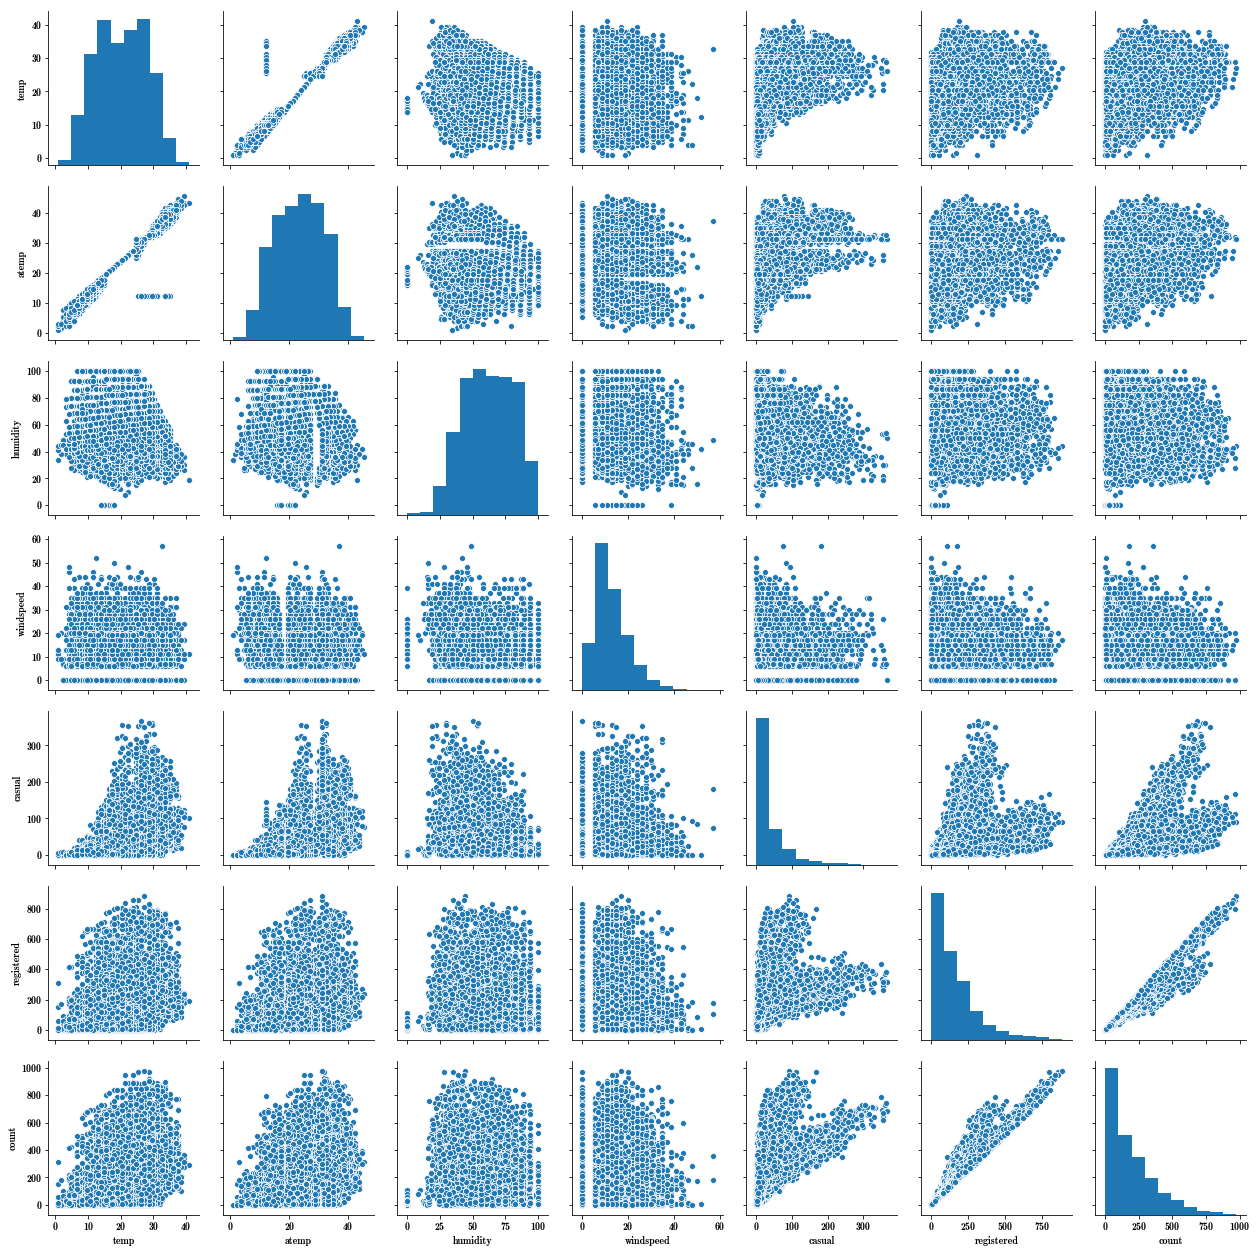

In [20]:
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

为了方便纵览全局, 我将图片尺寸缩小, 如下图所示. 纵轴从上往下依次是温度, 体感温度, 相对湿度, 风速, 未注册用户, 注册用户, 所有用户, 横轴从左往右是同样的顺序.

经过对数变换之后, 注册用户和所有用户的租赁数量和正态还是相差较大, 故在计算相关系数时选择spearman相关系数.

从图上可以看出, 温度和体感温度分别与未注册用户, 注册用户, 所有用户均有一定程度的正相关, 而相对湿度和风速与之呈现一定程度的负相关. 另外, 其他变量之间也有不同程度的相关关系.

另外, 第四列(风速)在散点图中间有明显的间隙. 需要揪出这一块来看看.

In [21]:
df['windspeed']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

风速为0, 这明显不合理, 把其当成缺失值来处理. 我这里选择的是向后填充.

In [22]:
df.loc[df.windspeed == 0, 'windspeed'] = np.nan 
df.fillna(method='bfill', inplace=True) 
df.windspeed.isnull().sum()

0

## 3.7 相关矩阵

由于多个变量不满足正态分布, 对其进行对数变换.

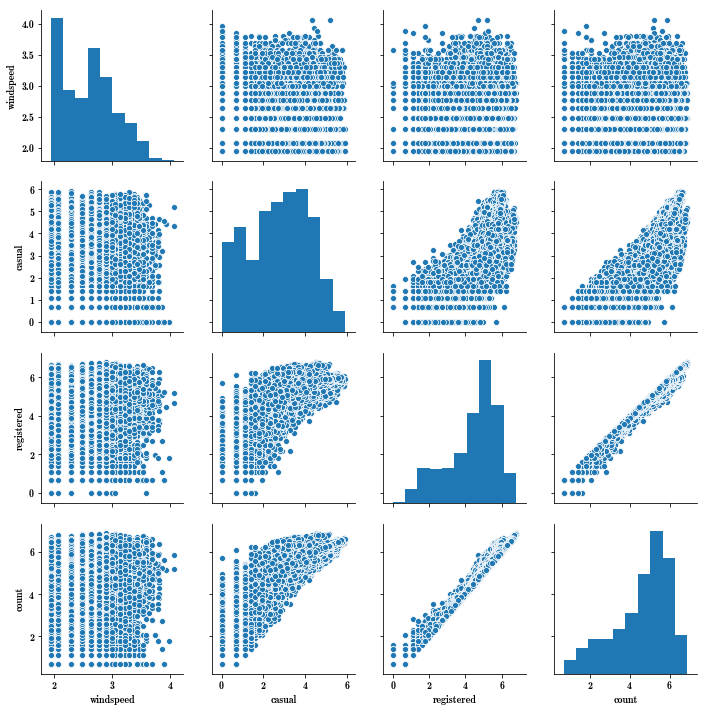

In [23]:
#对数转换 
df['windspeed'] = np.log(df['windspeed'].apply(lambda x: x+1)) 
df['casual'] = np.log(df['casual'].apply(lambda x: x+1)) 
df['registered'] = np.log(df['registered'].apply(lambda x: x+1)) 
df['count'] = np.log(df['count'].apply(lambda x: x+1)) 
sns.pairplot(df[['windspeed', 'casual', 'registered', 'count']])

经过对数变换之后, 注册用户和所有用户的租赁数量和正态还是相差较大, 故在计算相关系数时选择spearman相关系数.

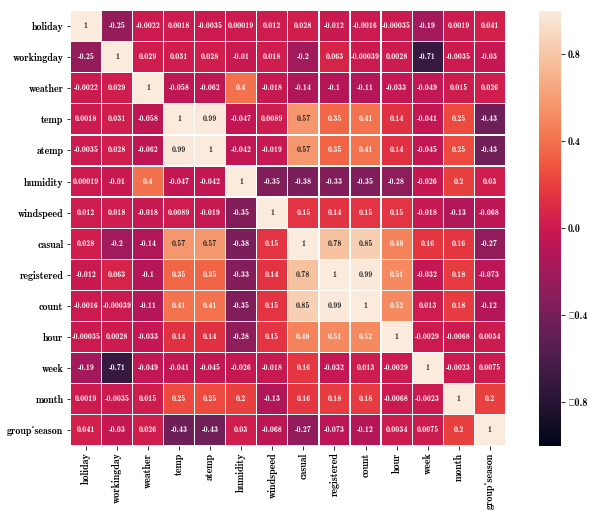

In [24]:
correlation = df.corr(method='spearman') 
plt.figure(figsize=(12, 8)) 
#绘制热力图 
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w', annot=True,annot_kws={'size':8},square=True)

# 4.回归模型

## 4.1 Ridge回归

### 4.1.1 划分数据集

由于所有用户的租赁数量是由未注册用户和注册用户相加而成, 故删除

In [25]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [26]:
X = df.drop(['count','year_month','date'],axis=1)
y = df['count']

划分训练集和测试集

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### 4.1.2 模型训练

这里的alpha指的是正则化项参数, 初始先设置为1

In [28]:
rd = Ridge(alpha=1)
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00770067 -0.00034301  0.0039196   0.00818243  0.03635549 -0.01558927
  0.09080788  0.0971406   0.02791812  0.06114358 -0.00099811]
2.684027134374068


通过前面我们知道, 正则化项参数对结果的影响较大, 下一步我们就通过岭迹图来选择正则化参数.

/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u6b63' [U+6b63], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u5219' [U+5219], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u5316' [U+5316], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u9879' [U+9879], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/pytho

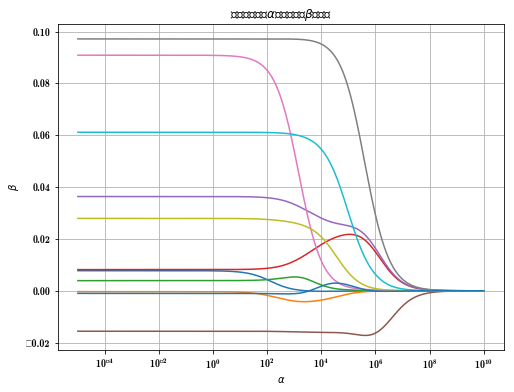

In [29]:
#设置参数以及训练模型
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train, y_train)
    betas.append(rd.coef_)
#绘制岭迹图
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
#对数据进行对数转换, 便于观察.
plt.xscale('log')
#添加网格线
plt.grid(True)
#坐标轴适应数据量
plt.axis('tight')
plt.title(r'正则化项参数$\alpha$和回归系数$\beta$岭迹图')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

由于是通过肉眼观察的, 其不一定是最佳, 采用另外一种方式: 交叉验证的岭回归.

In [30]:
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train, y_train)
rd_cv.alpha_

805.0291812295973

最后选出的最佳正则化项参数为805.03, 然后用这个参数进行模型训练

In [31]:
rd = Ridge(alpha=805.0291812295973) #, fit_intercept=False
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00074612 -0.00382265  0.00532093  0.01100823  0.03375475 -0.01582157
  0.0584206   0.09708992  0.02639369  0.0604242  -0.00116086]
2.7977274604845803


## 4.1.3 模型预测

In [32]:
#分别预测训练数据和测试数据
ridge_y_train_pred = rd.predict(X_train)
ridge_y_test_pred = rd.predict(X_test)
#分别计算其均方根误差和拟合优度
ridge_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, ridge_y_train_pred))
ridge_y_train_score = rd.score(X_train, y_train)
ridge_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, ridge_y_test_pred))
ridge_y_test_score = rd.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(ridge_y_train_rmse, ridge_y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(ridge_y_test_rmse, ridge_y_test_score))

训练集RMSE: 1.0348076524200298, 评分: 0.46691272323469246
测试集RMSE: 1.0508046977499312, 评分: 0.45801571689420717


## 4.2 Lasso

/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u6b63' [U+6b63], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u5219' [U+5219], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u5316' [U+5316], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u9879' [U+9879], substituting with a dummy symbol.
  MathTextWarning)
/opt/conda/lib/pytho

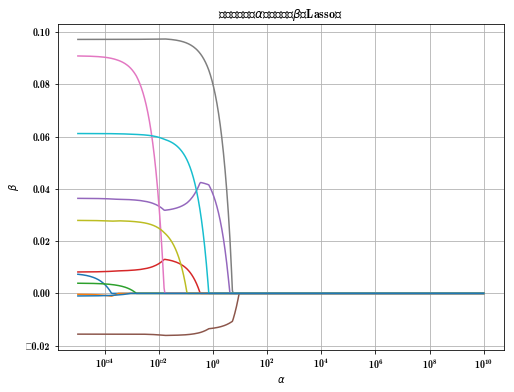

In [33]:
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    Las = Lasso(alpha = alpha)
    Las.fit(X_train, y_train)
    betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'正则化项参数$\alpha$和回归系数$\beta$的Lasso图')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

通过Lasso回归曲线, 可以看出大致在10附近所有变量趋于稳定

同样采用交叉验证选择Lasso回归最优正则化项参数

In [34]:
Las_cv = LassoCV(alphas=alphas, cv=10)
Las_cv.fit(X_train, y_train)
Las_cv.alpha_

0.005074705239490466

用这个参数重新训练模型

In [35]:
Las = Lasso(alpha=0.005074705239490466)
Las.fit(X_train, y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.         -0.          0.          0.01001827  0.03467474 -0.01570339
  0.06202352  0.09721864  0.02632133  0.06032038 -0.        ]
2.780830398244292


对比岭回归可以发现, 这里的回归系数中有0存在, 也就是舍弃了holiday, workingday, weather和group_season这四个自变量.

In [36]:
#用Lasso分别预测训练集和测试集, 并计算均方根误差和拟合优度
lasso_y_train_pred = Las.predict(X_train)
lasso_y_test_pred = Las.predict(X_test)
lasso_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, lasso_y_train_pred))
lasso_y_train_score = Las.score(X_train, y_train)
lasso_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, lasso_y_test_pred))
lasso_y_test_score = Las.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(lasso_y_train_rmse, lasso_y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(lasso_y_test_rmse, lasso_y_test_score))

训练集RMSE: 1.0347988070045209, 评分: 0.4669218367318746
测试集RMSE: 1.050818996520012, 评分: 0.45800096674816204


## 4.3 线性回归

最后, 再用传统的线性回归进行预测, 从而对比三者之间的差异.

In [37]:
#训练线性回归模型
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)

[ 0.00775915 -0.00032048  0.00391537  0.00817703  0.03636054 -0.01558878
  0.09087069  0.09714058  0.02792397  0.06114454 -0.00099731]
2.6837869701964037


In [38]:
#分别预测训练集和测试集, 并计算均方根误差和拟合优度
lr_y_train_pred = LR.predict(X_train)
lr_y_test_pred = LR.predict(X_test)
lr_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, lr_y_train_pred))
lr_y_train_score = LR.score(X_train, y_train)
lr_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, lr_y_test_pred))
lr_y_test_score = LR.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(lr_y_train_rmse, lr_y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(lr_y_test_rmse, lr_y_test_score))

训练集RMSE: 1.0347173340121176, 评分: 0.46700577529675036
测试集RMSE: 1.0510323073614725, 评分: 0.45778089839236125


## 4.4 Elastic Net

In [39]:
Els_cv = ElasticNetCV(alphas=alphas, cv=10)
Els_cv.fit(X_train, y_train)
Els_cv.alpha_

0.009461323755890769

In [40]:
Els = ElasticNet(alpha=0.009461323755890769)
Els.fit(X_train, y_train)
print(Els.coef_)
print(Els.intercept_)

[ 0.         -0.          0.          0.0100756   0.03462637 -0.01570219
  0.06227413  0.09721359  0.02637802  0.0603261  -0.        ]
2.7799397737065235


In [41]:
#用ElasticNet分别预测训练集和测试集, 并计算均方根误差和拟合优度
els_y_train_pred = Els.predict(X_train)
els_y_test_pred = Els.predict(X_test)
els_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, els_y_train_pred))
els_y_train_score = Els.score(X_train, y_train)
els_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, els_y_test_pred))
els_y_test_score = Els.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(els_y_train_rmse, els_y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(els_y_test_rmse, els_y_test_score))

训练集RMSE: 1.0347973056394495, 评分: 0.46692338359170604
测试集RMSE: 1.0508238633371485, 评分: 0.45799594625214857


## 4.5 Adaptive Lasso

由于python库中没有相应的函数，因此在GitHub上参考了一段代码（https://github.com/AaronNHorvitz/AdaptiveLASSO/blob/master/adaptive_LASSO.py ），并进行相应修改。

本项目的修改和扩展主要有三：

一是源代码中没有估计截距项，本文修改成带有截距项的回归模型。

二是源代码中不包含预测值，本文计算了训练集、测试集的模型预测值，便于评价模型。

三是源代码中不包含模型评价准则代码，本文根据sklearn中score函数的源代码，计算出Adaptive Lasso模型的评价指标。

使用lassoCV给出的alpha值，代入adaptive lasso

In [42]:
def Adaptive_LASSO(X_train,y_train,max_iterations = 1000,lasso_iterations = 10, alpha = 0.005074705239490466, tol = 0.001, max_error_up = 5, title = ''):
    
    # set checks
    higher  = float('inf')
    lower   = 0
    
    # set lists
    coefficients_list = []
    iterations_list   = []
    
    # set variables
    X_train  = X_train
    y_train  = y_train
    
    # set constants
    alpha    = alpha
    tol      = tol
    max_iter = max_iterations
    n_lasso_iterations = lasso_iterations
    
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

    n_samples, n_features = X_train.shape
    p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y_train - np.dot(X_train, w)) ** 2) \
                      + alpha * np.sum(g(w))

    weights = np.ones(n_features)
    X_w = X_train / weights[np.newaxis, :]
    X_w  = np.nan_to_num(X_w)
    X_w  = np.round(X_w,decimals = 3)

    y_train    = np.nan_to_num(y_train)

    adaptive_lasso = Lasso(alpha=alpha, fit_intercept=True)

    adaptive_lasso.fit(X_w, y_train)

    for k in range(n_lasso_iterations):
        X_w = X_train / weights[np.newaxis, :]
        adaptive_lasso = Lasso(alpha=alpha, fit_intercept=True)
        adaptive_lasso.fit(X_w, y_train)
        coef_ = adaptive_lasso.coef_ / weights
        weights = gprime(coef_)
        
        print ('Iteration #',k+1,':   ',p_obj(coef_))  # should go down
        
        iterations_list.append(k)
        coefficients_list.append(p_obj(coef_))
        
    print (np.mean((adaptive_lasso.coef_ != 0.0) == (coef_ != 0.0)))   
    
    coef = pd.Series(adaptive_lasso.coef_, index = X_train.columns)
    print('=============================================================================')
    print("Adaptive LASSO picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
    print('=============================================================================')
    print("系数：",adaptive_lasso.coef_)
    print("截距：",adaptive_lasso.intercept_)
    plt.rcParams["figure.figsize"] = (18,8)

    # subplot of the predicted vs. actual

    plt.plot(iterations_list,coefficients_list,color = 'orange')
    plt.scatter(iterations_list,coefficients_list,color = 'green')
    plt.title('Iterations vs. p_obj(coef_)')
    plt.show()

    # plot of the coefficients'

    imp_coef = pd.concat([coef.sort_values().tail(10),])#,coef.sort_values().tail(10)
    imp_coef.plot(kind = "barh", color = 'green',fontsize=14)
    plt.title("Top 10 Coefficients Selected by the Adaptive LASSO Model", fontsize = 14)
    plt.show()
    return adaptive_lasso

Iteration # 1 :    4.408917757389263
Iteration # 2 :    4.653287007964163
Iteration # 3 :    4.779198289803339
Iteration # 4 :    4.974459072802686
Iteration # 5 :    4.97484692235236
Iteration # 6 :    4.9748633794618975
Iteration # 7 :    4.974864841092999
Iteration # 8 :    4.974864974015832
Iteration # 9 :    4.9748649861100045
Iteration # 10 :    4.9748649872104185
1.0
Adaptive LASSO picked 5 variables and eliminated the other 6 variables.
系数： [ 0.         -0.          0.          0.          0.1043183  -0.06362913
  0.          0.15613827  0.0757625   0.12194196 -0.        ]
截距： 2.9776876125153664


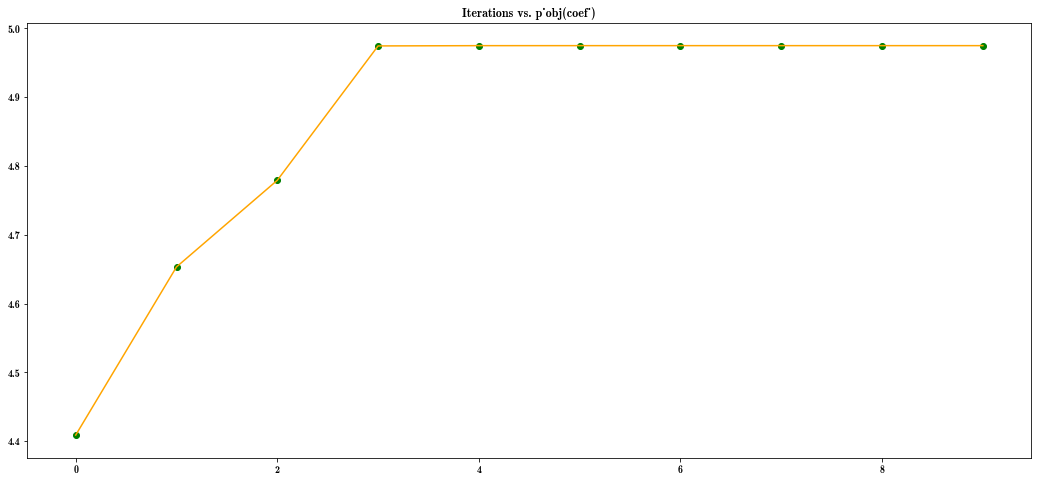

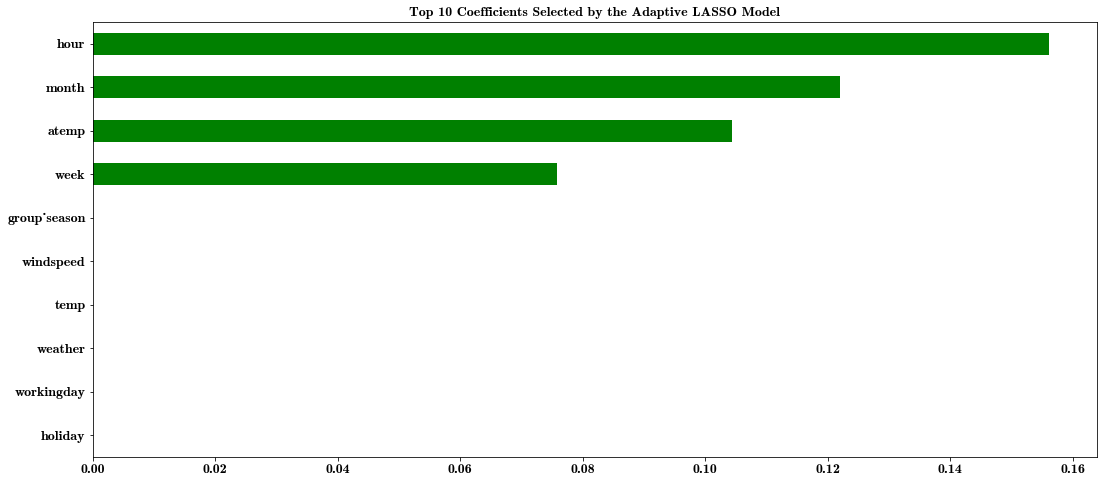

In [43]:
# variable selection with LASSO for the model
model = Adaptive_LASSO(X_train,
                       y_train,
                       max_iterations = 5000,
                       lasso_iterations = 10, 
                       alpha = 0.005074705239490466, 
                       tol = 0.001, 
                       max_error_up = 5, 
                       title = '')

计算模型截距项

In [44]:
# look at the coefficients in the model
coef = pd.Series(model.coef_, index = X_train.columns)
coef = pd.DataFrame(coef).reset_index()
coef_list = coef.loc[coef[0]!= 0.0]['index'].to_list()
new_X_train = X_train[coef_list]
ada_intercept = model.intercept_

In [45]:
coef_list

['atemp', 'humidity', 'hour', 'week', 'month']

计算模型预测值

In [46]:
ada_y_test_pred = np.dot(np.array(X_test),np.array(coef[0]))+ada_intercept 
ada_y_train_pred = np.dot(np.array(X_train),np.array(coef[0]))+ada_intercept 

In [48]:
ada_y_train_pred

array([2.77375634, 3.59010865, 2.29210956, ..., 0.45370251, 4.33474824,
       0.77827768])

计算模型评分

In [49]:
ada_y_train_score =  ((y_train - ada_y_train_pred)**2).sum()/((y_train - y_train.mean())**2).sum() -1
ada_y_test_score =  ((y_test - ada_y_test_pred)**2).sum()/((y_test - y_test.mean())**2).sum() -1

In [53]:
#用Adaptive Lasso分别预测训练集和测试集, 并计算均方根误差和拟合优度
ada_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, ada_y_train_pred))
ada_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, ada_y_test_pred))
print('训练集RMSE: {0}, 评分: {1}'.format(ada_y_train_rmse, ada_y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(ada_y_test_rmse, ada_y_test_score))

训练集RMSE: 1.6488433326718732, 评分: 0.35343635777520443
测试集RMSE: 1.7017039247458843, 评分: 0.42138157773200846


# 5. 总结

1. 模型评价

    采取均方根误差RMSE评价模型拟合效果，RMSE值越小，拟合效果越好。

    采取sklearn库中score函数评价模型拟合效果，score值越高，拟合效果越好。其中score即R2，即1减模型残差平方和与离差平方和的比值。

    整体上看，训练集的RMSE均低于测试集，训练集的score均高于测试集，表明数据在训练集上的拟合效果优于在验证集上的拟合效果。
    
2. 模型比较

    从RMSE指标和score指标上看，线性回归、Ridge、Lasso与Elastic Net模型表现差别不大，Ridge模型略优于其他模型。Adaptive Lasso模型的效果最差，训练集和测试集的RMSE值均高于其他。

    Lasso和Elastic Net模型拟合效果差于Ridge模型，可能原因是二者都进行了稀疏建模，但本数据集不一定适用于稀疏模型，因而拟合结果不够理想。

    Adaptive Lasso拟合效果不好的可能原因有二：一是Adaptive Lasso没有标准的python实现代码，本文借鉴的代码可能存在一定问题，因此模型拟合效果不够理想。二是可能使该共享单车数据集不适用Adaptive Lasso方法，导致拟合效果不理想。

    综上所述，Ridge模型在本数据集上达到了较优效果，但还需要学习其他模型, 比如决策树、随机森林、神经网络等。